## Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#### Helper Functions

In [2]:
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = (data[column] < lower_limit) | (data[column] > upper_limit)
    return outliers

## -------------------------------------------------------------------------------------------------------

## Reading the CSV File

In [3]:
data = pd.read_csv("first inten project.csv")
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
len(data)

36285

Categorical features are :
* room type
* type of meal
* market segment type

In [5]:
categ_cols = ['type of meal','room type','market segment type']

## -------------------------------------------------------------------------------------------------------

### Checking "number of adults" Feature

In [6]:
column = "number of adults"

In [7]:
data[column].describe()

count    36285.000000
mean         1.844839
std          0.518813
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: number of adults, dtype: float64

In [8]:
data[column].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [9]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of adults'>

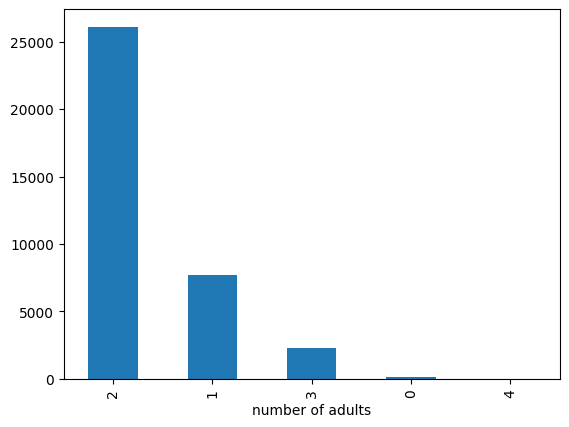

In [10]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of children" Feature

In [11]:
column = "number of children"

In [12]:
data[column].describe()

count    36285.000000
mean         0.105360
std          0.402704
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: number of children, dtype: float64

In [13]:
data[column].value_counts()

number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [14]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of children'>

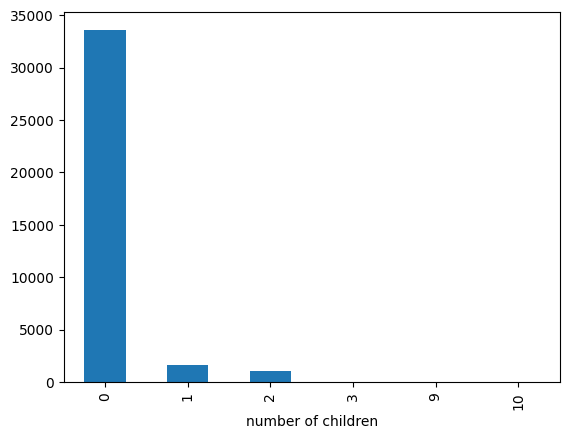

In [15]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of weekend nights" Feature

In [16]:
column = "number of weekend nights"

In [17]:
data[column].describe()

count    36285.000000
mean         0.810693
std          0.870590
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: number of weekend nights, dtype: float64

In [18]:
data[column].value_counts()

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [19]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of weekend nights'>

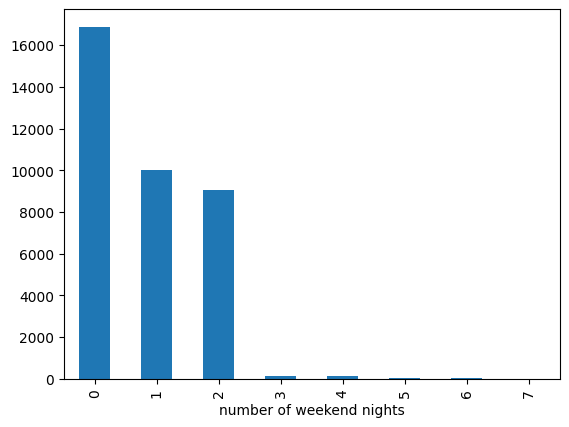

In [20]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of week nights" Feature

In [21]:
column = "number of week nights"

In [22]:
data[column].describe()

count    36285.000000
mean         2.204602
std          1.410946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: number of week nights, dtype: float64

In [23]:
data[column].value_counts()

number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [24]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of week nights'>

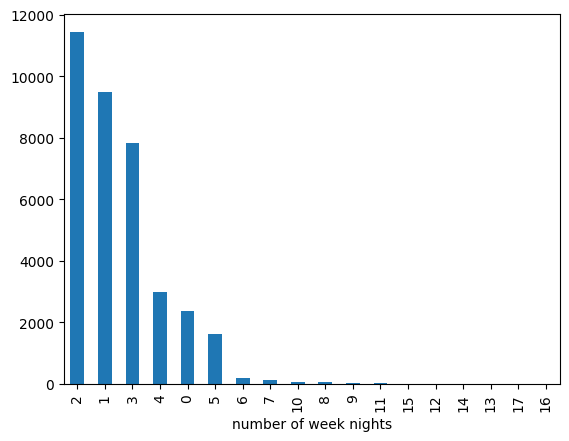

In [25]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "type of meal" Feature

In [26]:
column = "type of meal"

In [27]:
data[column].describe()

count           36285
unique              4
top       Meal Plan 1
freq            27842
Name: type of meal, dtype: object

In [28]:
data[column].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [29]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='type of meal'>

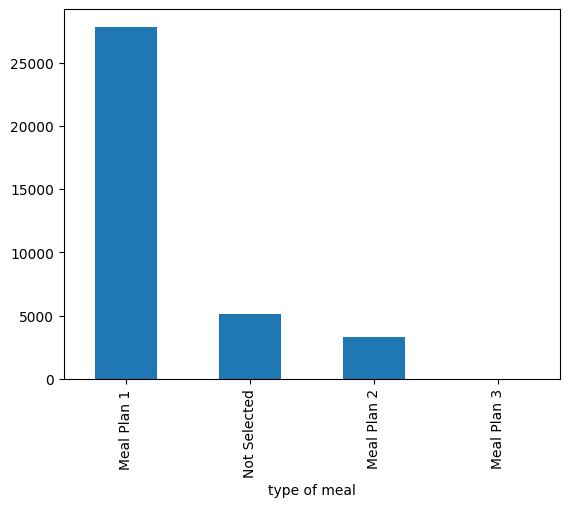

In [30]:
data[column].value_counts().plot(kind='bar')

##### Do One-Hot encoding for this categorical feature

* Not Selected ...> 0
* Meal Plan 1  ...> 1
* Meal Plan 2  ...> 2
* Meal Plan 3  ...> 3

In [31]:
'''
data[column] = data[column].replace("Not Selected", 0)
data[column] = data[column].replace("Meal Plan 1", 1)
data[column] = data[column].replace("Meal Plan 2", 2)
data[column] = data[column].replace("Meal Plan 3", 3)
'''

'\ndata[column] = data[column].replace("Not Selected", 0)\ndata[column] = data[column].replace("Meal Plan 1", 1)\ndata[column] = data[column].replace("Meal Plan 2", 2)\ndata[column] = data[column].replace("Meal Plan 3", 3)\n'

In [32]:
data[column].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "car parking space" Feature

In [33]:
column = "car parking space"

In [34]:
data[column].describe()

count    36285.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: car parking space, dtype: float64

In [35]:
data[column].value_counts()

car parking space
0    35161
1     1124
Name: count, dtype: int64

In [36]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='car parking space'>

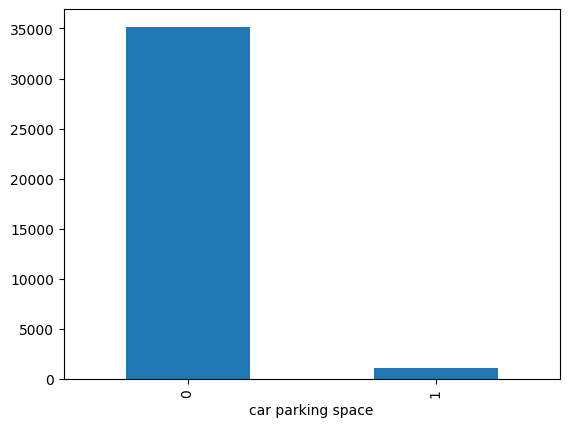

In [37]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "room type" Feature

In [38]:
column = "room type"

In [39]:
data[column].describe()

count           36285
unique              7
top       Room_Type 1
freq            28138
Name: room type, dtype: object

In [40]:
data[column].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [41]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='room type'>

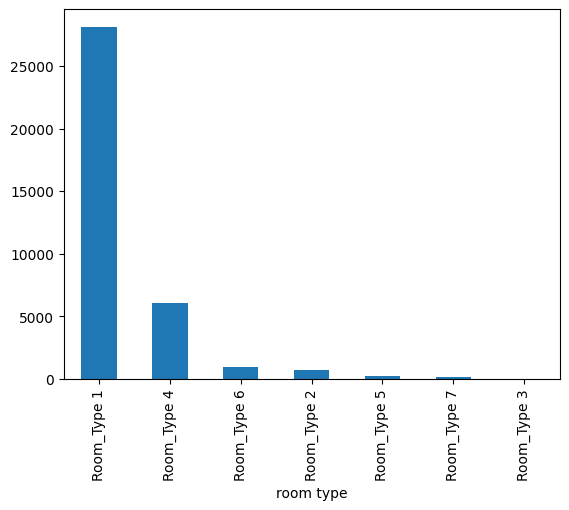

In [42]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [43]:
# Room_Type 1  ...> 0
# Room_Type 2  ...> 1
# Room_Type 3  ...> 2
# Room_Type 4  ...> 3
# Room_Type 5  ...> 4
# Room_Type 6  ...> 5
# Room_Type 7  ...> 6

In [44]:
'''
data[column] = data[column].replace("Room_Type 1", 0)
data[column] = data[column].replace("Room_Type 2", 1)
data[column] = data[column].replace("Room_Type 3", 2)
data[column] = data[column].replace("Room_Type 4", 3)
data[column] = data[column].replace("Room_Type 5", 4)
data[column] = data[column].replace("Room_Type 6", 5)
data[column] = data[column].replace("Room_Type 7", 6)
'''

'\ndata[column] = data[column].replace("Room_Type 1", 0)\ndata[column] = data[column].replace("Room_Type 2", 1)\ndata[column] = data[column].replace("Room_Type 3", 2)\ndata[column] = data[column].replace("Room_Type 4", 3)\ndata[column] = data[column].replace("Room_Type 5", 4)\ndata[column] = data[column].replace("Room_Type 6", 5)\ndata[column] = data[column].replace("Room_Type 7", 6)\n'

In [45]:
data[column].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "lead time" Feature

In [46]:
column = "lead time"

In [47]:
data[column].describe()

count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead time, dtype: float64

In [48]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='lead time', ylabel='Count'>

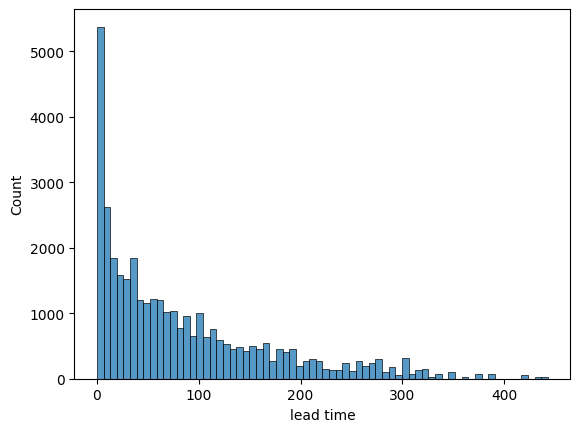

In [49]:
sns.histplot(data[column], kde=False)

<Axes: xlabel='lead time'>

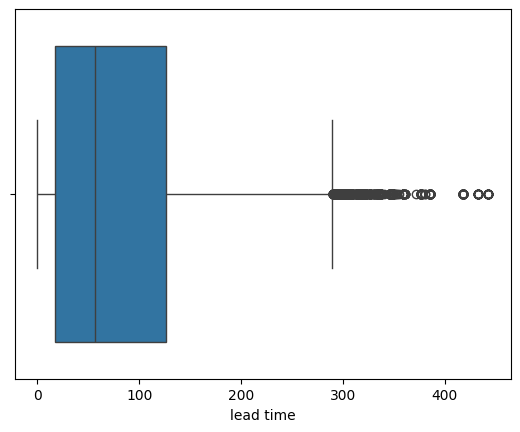

In [50]:
sns.boxplot(data[column], orient="h")

In [51]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1332


- I will not remove/replace the outliers because higher values for lead time may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "market segment type" Feature

In [52]:
column = "market segment type"

In [53]:
data[column].describe()

count      36285
unique         5
top       Online
freq       23221
Name: market segment type, dtype: object

In [54]:
data[column].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [55]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='market segment type'>

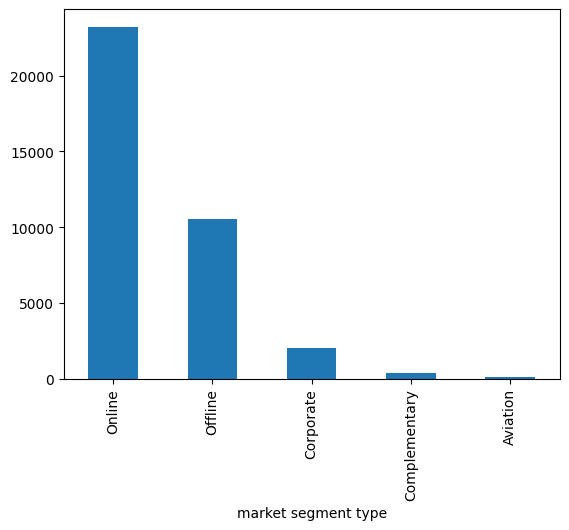

In [56]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [57]:
# Online         ...> 0
# Offline        ...> 1
# Corporate      ...> 2
# Complementary  ...> 3
# Aviation       ...> 4

In [58]:
'''
data[column] = data[column].replace("Online", 0)
data[column] = data[column].replace("Offline", 1)
data[column] = data[column].replace("Corporate", 2)
data[column] = data[column].replace("Complementary", 3)
data[column] = data[column].replace("Aviation", 4)
'''

'\ndata[column] = data[column].replace("Online", 0)\ndata[column] = data[column].replace("Offline", 1)\ndata[column] = data[column].replace("Corporate", 2)\ndata[column] = data[column].replace("Complementary", 3)\ndata[column] = data[column].replace("Aviation", 4)\n'

In [59]:
data[column].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "repeated" Feature

In [60]:
column = "repeated"

In [61]:
data[column].describe()

count    36285.000000
mean         0.025630
std          0.158032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated, dtype: float64

In [62]:
data[column].value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

In [63]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='repeated'>

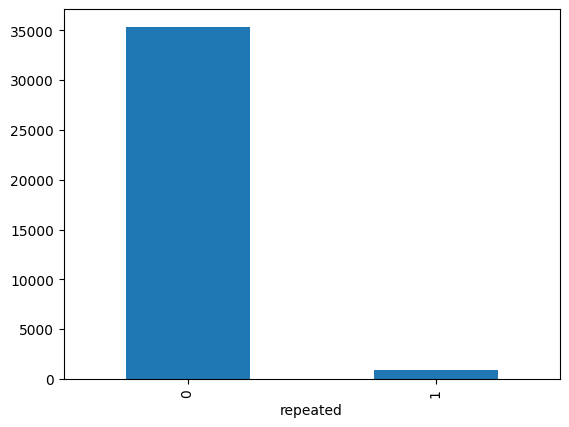

In [64]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-C" Feature

In [65]:
column = "P-C"

In [66]:
data[column].describe()

count    36285.000000
mean         0.023343
std          0.368281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: P-C, dtype: float64

In [67]:
data[column].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [68]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='P-C'>

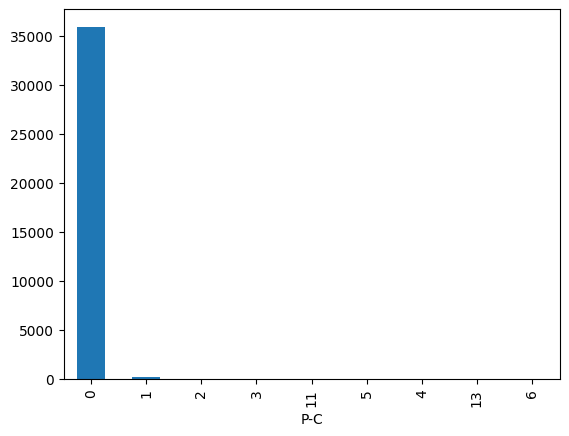

In [69]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-not-C" Feature

In [70]:
column = "P-not-C"

In [71]:
data[column].describe()

count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: P-not-C, dtype: float64

In [72]:
data[column].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [73]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


In [74]:
#data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "average price" Feature

In [75]:
column = "average price "

In [76]:
data[column].describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average price , dtype: float64

In [77]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='average price ', ylabel='Count'>

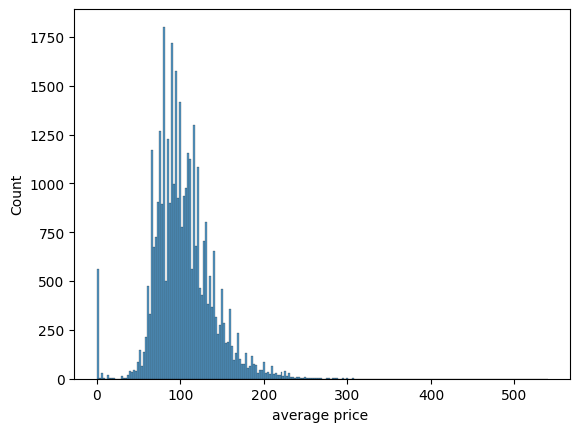

In [78]:
sns.histplot(data[column], kde=False)

<Axes: xlabel='average price '>

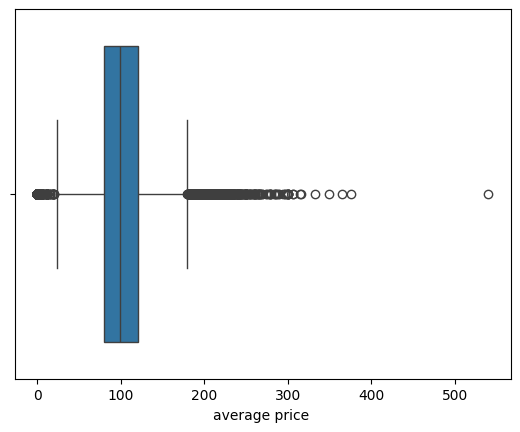

In [79]:
sns.boxplot(data[column], orient="h")

In [80]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1696


- I will not remove/replace the outliers because higher values for the average price may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "special requests" Feature

In [81]:
column = "special requests"

In [82]:
data[column].describe()

count    36285.000000
mean         0.619733
std          0.786262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: special requests, dtype: float64

In [83]:
data[column].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

In [84]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='special requests'>

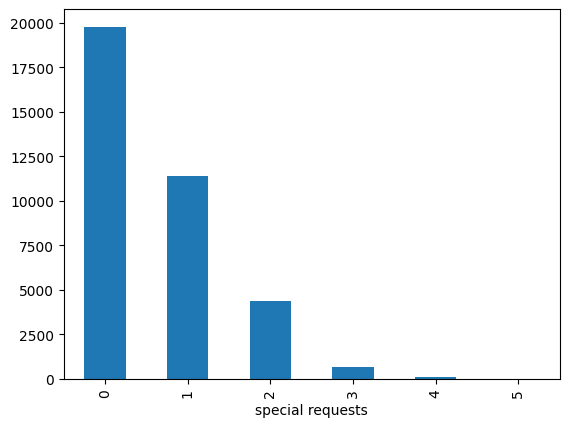

In [85]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "booking status" 

In [86]:
column = "booking status"

In [87]:
data[column].describe()

count            36285
unique               2
top       Not_Canceled
freq             24396
Name: booking status, dtype: object

In [88]:
data[column].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [89]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='booking status'>

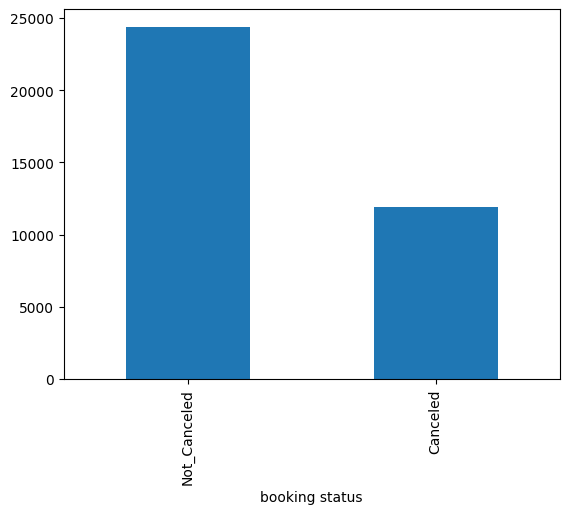

In [90]:
data[column].value_counts().plot(kind='bar')

##### Do label encoding for this categorical feature

In [91]:
# Not_Canceled  ...> 0
# Canceled      ...> 1

In [92]:
data[column] = data[column].replace("Not_Canceled", 0)
data[column] = data[column].replace("Canceled", 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10132\4098707111.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Canceled", 1)


In [93]:
data[column].value_counts()

booking status
0    24396
1    11889
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

## Checking the relationship between Categorical Features and Average Price

- You may ignore this section

In [94]:
def plot(x, y):
    sns.stripplot(x=x, y=y, data=data, jitter=True)
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

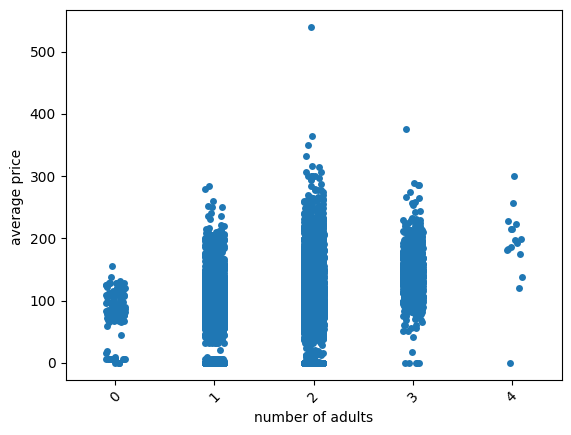

In [95]:
x = "number of adults"
y = "average price "
plot(x, y)

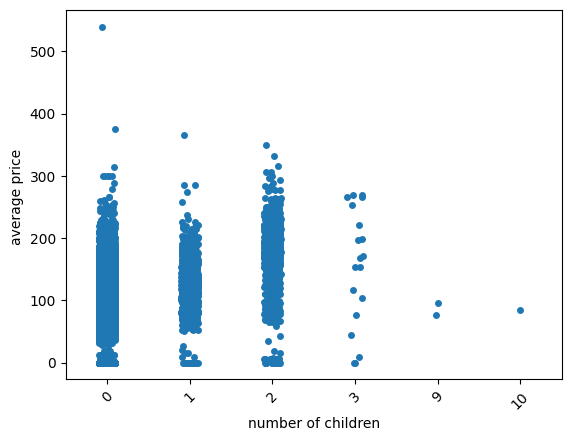

In [96]:
x = "number of children"
y = "average price "
plot(x, y)

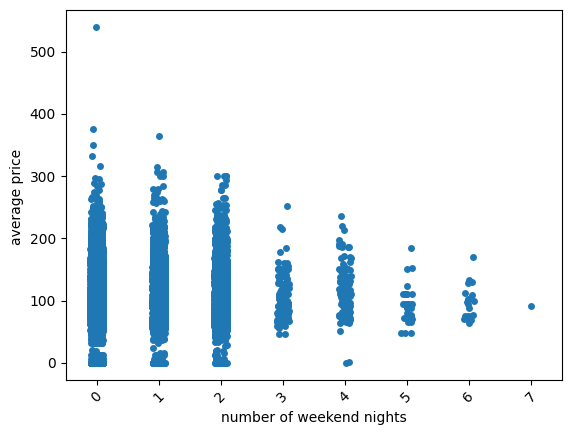

In [97]:
x = "number of weekend nights"
y = "average price "
plot(x, y)

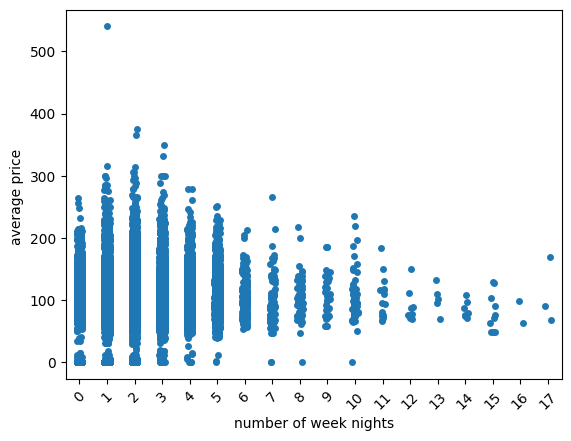

In [98]:
x = "number of week nights"
y = "average price "
plot(x, y)

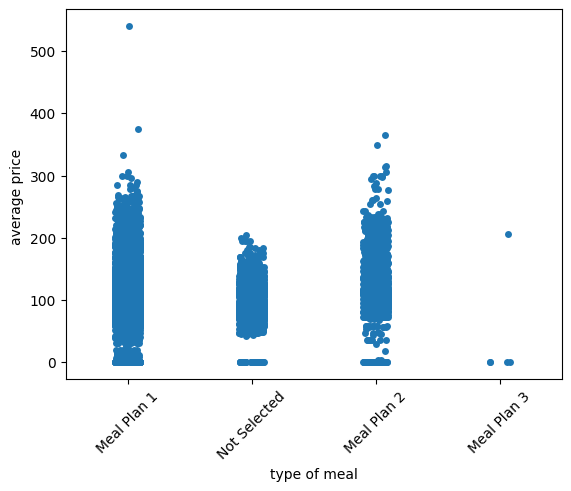

In [99]:
x = "type of meal"
y = "average price "
plot(x, y)

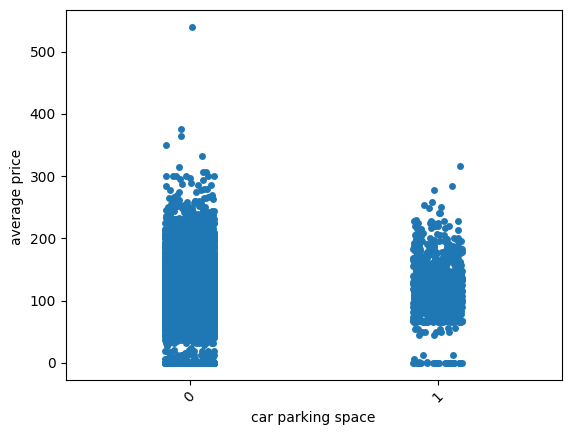

In [100]:
x = "car parking space"
y = "average price "
plot(x, y)

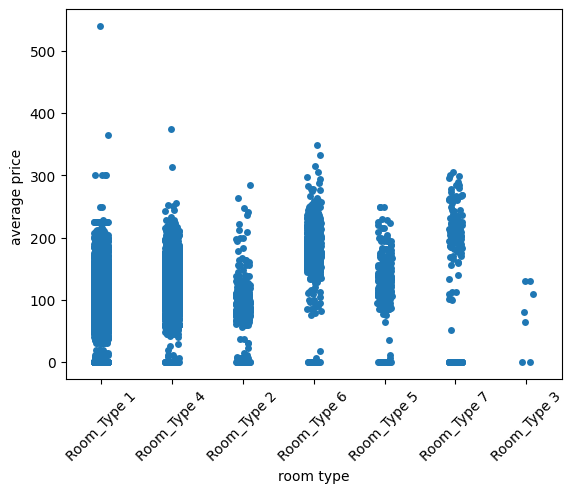

In [101]:
x = "room type"
y = "average price "
plot(x, y)

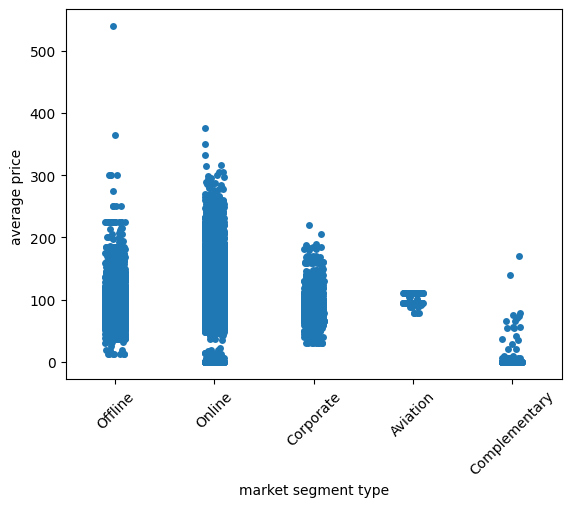

In [102]:
x = "market segment type"
y = "average price "
plot(x, y)

#### Comments
- The analysis suggests that average price does not exhibit a linear relationship with the individual categorical features examined. For instance, changes in the number of nights or the number of children do not appear to significantly affect the average price.
- Specifically, increasing the number of nights booked or the number of children does not show a corresponding change in the average price.
- I believe that average price may be influenced by a combination of features working together rather than any single feature individually. It is likely that the interplay between multiple variables contributes to variations in average price.

## -------------------------------------------------------------------------------------------------------

#### Combining the "number of week nights" and "number of weekend nights" into one Feature

In [103]:
data["total nights"] = data["number of week nights"] + data["number of weekend nights"]

#### Adding the Feature "month" and the Feature "day" from the "date of reservation"

In [104]:
data["date of reservation"] = pd.to_datetime(data["date of reservation"], format="%m/%d/%Y", errors="coerce")
data["month"] = data["date of reservation"].dt.month
data["day"] = data["date of reservation"].dt.day

In [105]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total nights,month,day
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,0,7,10.0,2.0
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,0,4,11.0,6.0
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,1,4,2.0,28.0
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,1,2,5.0,20.0
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,1,3,4.0,11.0


## -------------------------------------------------------------------------------------------------------

#### Dropping Unnecessary Features

In [106]:
data.drop(columns=["Booking_ID", "date of reservation", "number of weekend nights", "number of week nights"], inplace=True)

In [107]:
data.head()

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day
0,1,1,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,0,7,10.0,2.0
1,1,0,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0,4,11.0,6.0
2,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,1,4,2.0,28.0
3,1,0,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,1,2,5.0,20.0
4,1,0,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,1,3,4.0,11.0


# Data Analysis

In [108]:
# Variance
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
variance_values = numeric_cols.var()

# Skewness
skewness_values = numeric_cols.skew()

# Kurtosis
kurtosis_values = numeric_cols.kurtosis()

Stat_table = pd.DataFrame({'Column': variance_values.index, 
                           'Variance': variance_values.values,
                            'Skewness': skewness_values.values,
                            'Kurtosis': kurtosis_values.values})
                         
Stat_table

,Column,Variance,Skewness,Kurtosis
0,number of adults,0.269167,-0.332833,0.812610
1,number of children,0.162171,4.707675,36.947349
2,car parking space,0.030018,5.414464,27.317925
3,lead time,7385.476617,1.292436,1.179155
4,repeated,0.024974,6.003783,34.047290
5,P-C,0.135631,25.203359,732.938601
6,P-not-C,3.076273,19.252855,457.506897
7,average price,1231.060336,0.667186,3.154819
8,special requests,0.618208,1.145098,0.881753
9,booking status,0.220304,0.734411,-1.460721


In [109]:
#Covariance matrix 
covar_matrix = numeric_cols.cov()
print("Covariance Matrix:\n", covar_matrix)

Covariance Matrix:
                     number of adults  number of children  car parking space  \
number of adults            0.269167           -0.004184           0.001031   
number of children         -0.004184            0.162171           0.002386   
car parking space           0.001031            0.002386           0.030018   
lead time                   4.325470           -1.628595          -0.989323   
repeated                   -0.015756           -0.002315           0.003037   
P-C                        -0.009056           -0.002432           0.001730   
P-not-C                    -0.108382           -0.014974           0.019392   
average price               5.403332            4.768574           0.372706   
special requests            0.077227            0.039377           0.011973   
booking status              0.021131            0.006239          -0.007008   
total nights                0.123832            0.024378          -0.016624   
month                       0.03

Correlation Matrix:
                     number of adults  number of children  car parking space  \
number of adults            1.000000           -0.020027           0.011467   
number of children         -0.020027            1.000000           0.034198   
car parking space           0.011467            0.034198           1.000000   
lead time                   0.097014           -0.047058          -0.066444   
repeated                   -0.192175           -0.036371           0.110916   
P-C                        -0.047395           -0.016398           0.027109   
P-not-C                    -0.119106           -0.021201           0.063814   
average price               0.296832            0.337491           0.061310   
special requests            0.189317            0.124363           0.087889   
booking status              0.086774            0.033007          -0.086179   
total nights                0.133641            0.033894          -0.053724   
month                       0.0

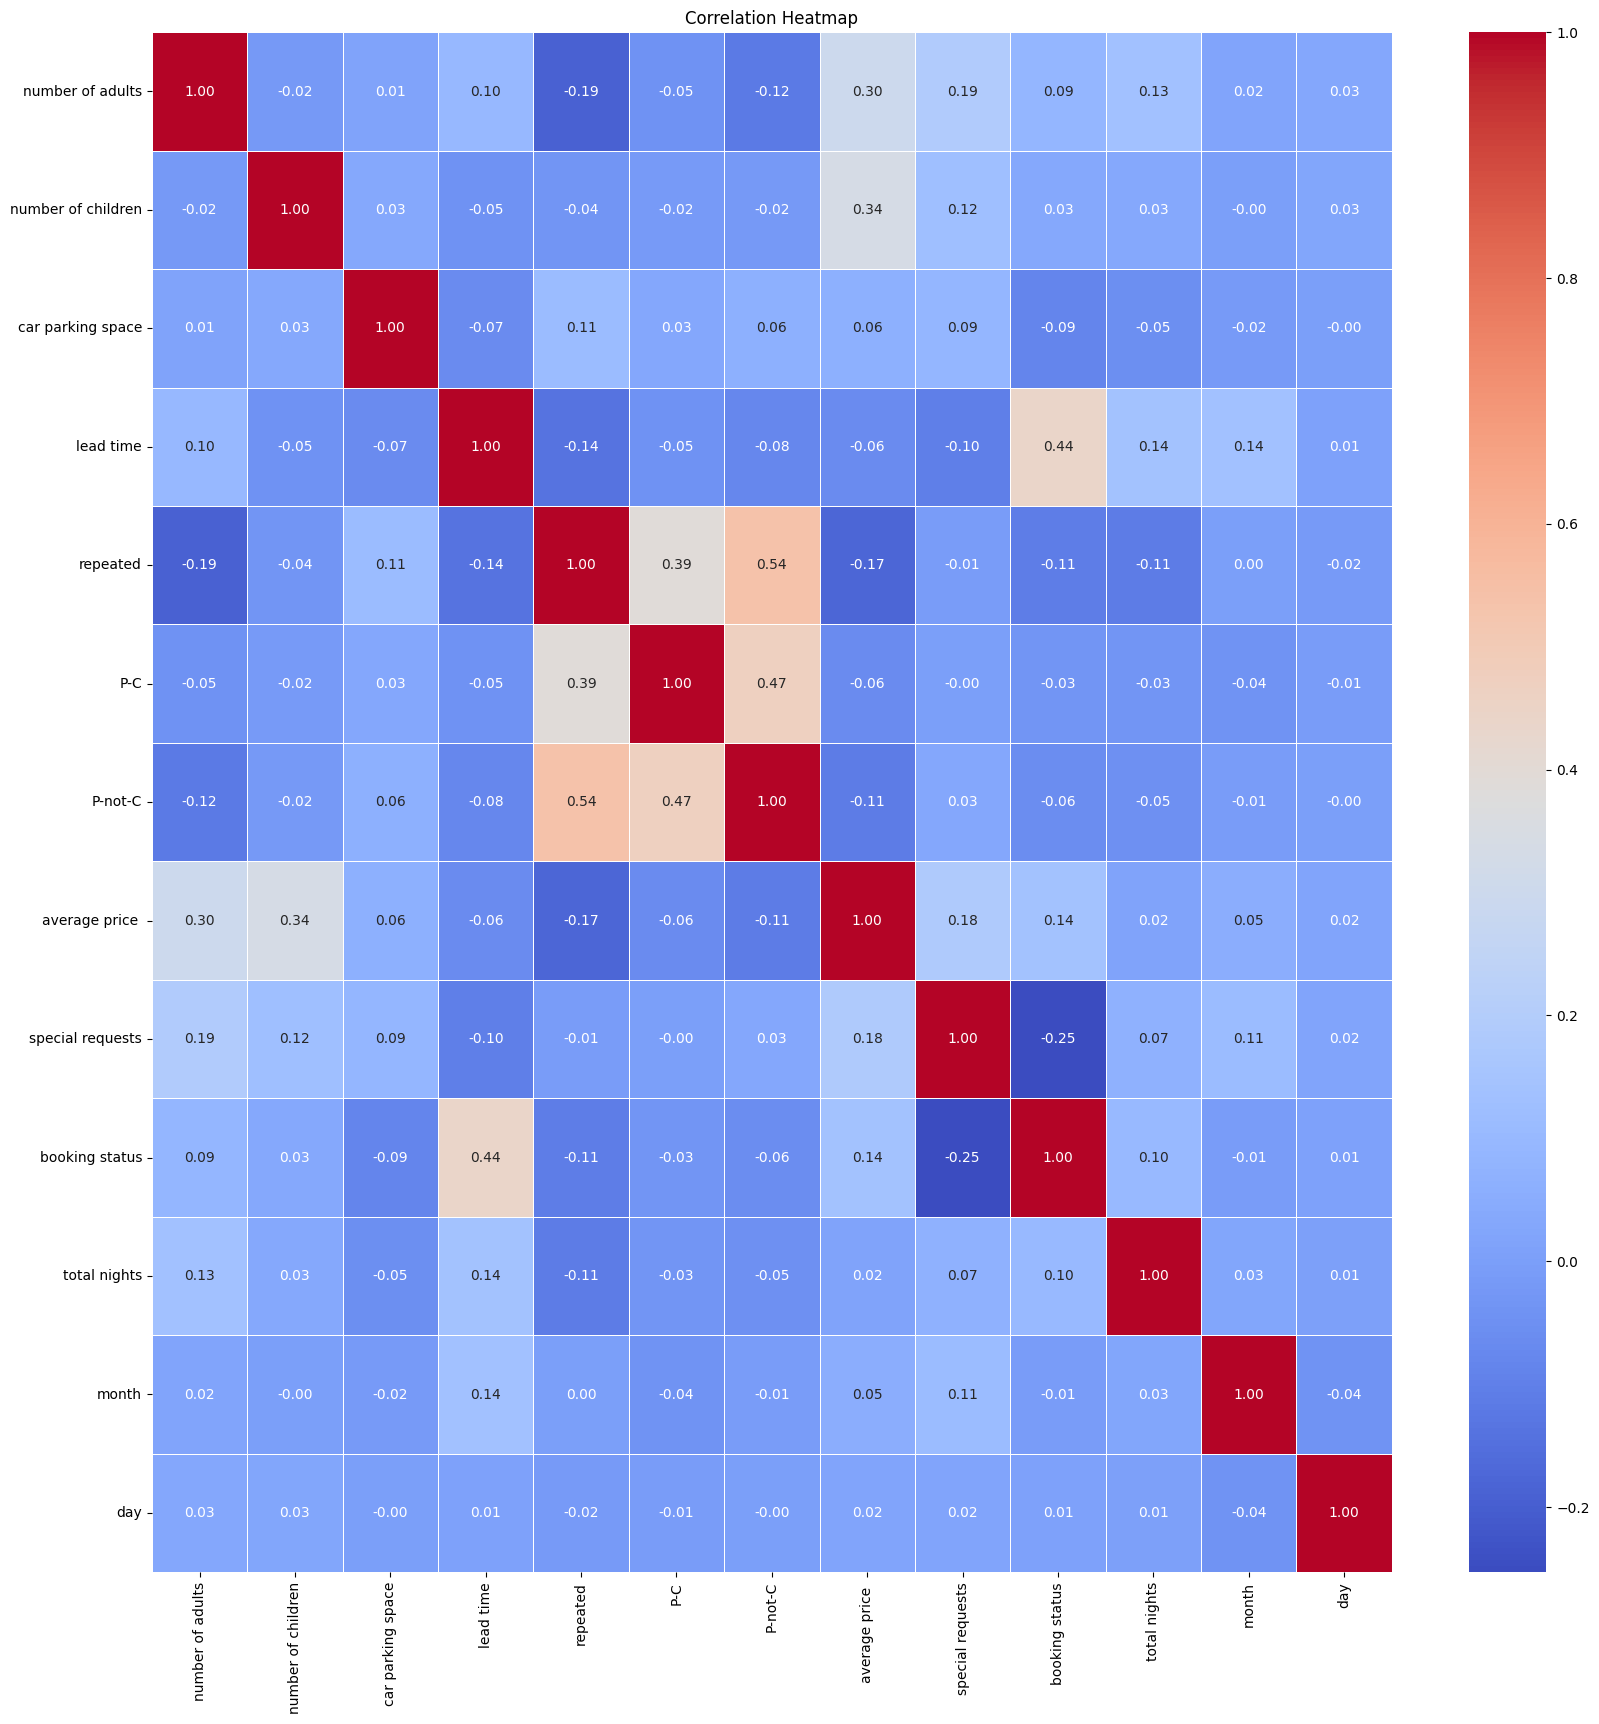

In [110]:
#correlation using heatmap
corr_matrix = numeric_cols.corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [111]:
data.to_excel("cleaned_data_after_eda.xlsx", index=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10132\2447640762.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  data.to_excel("cleaned_data_after_eda.xlsx", index=False)


# Room Type and Meal Plan Demand: Highlights which room types and meal plans are most popular.

<Figure size 1200x800 with 0 Axes>

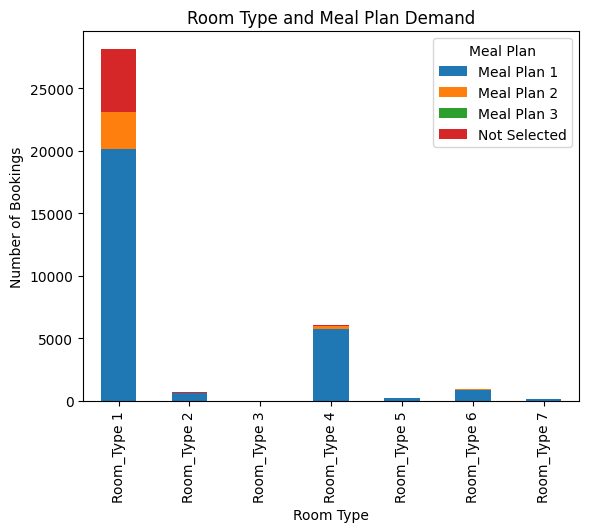

In [112]:
room_meal_demand = data.groupby(['room type', 'type of meal']).size().unstack()

plt.figure(figsize=(12, 8))
room_meal_demand.plot(kind='bar', stacked=True)
plt.title('Room Type and Meal Plan Demand')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Meal Plan')
plt.show()


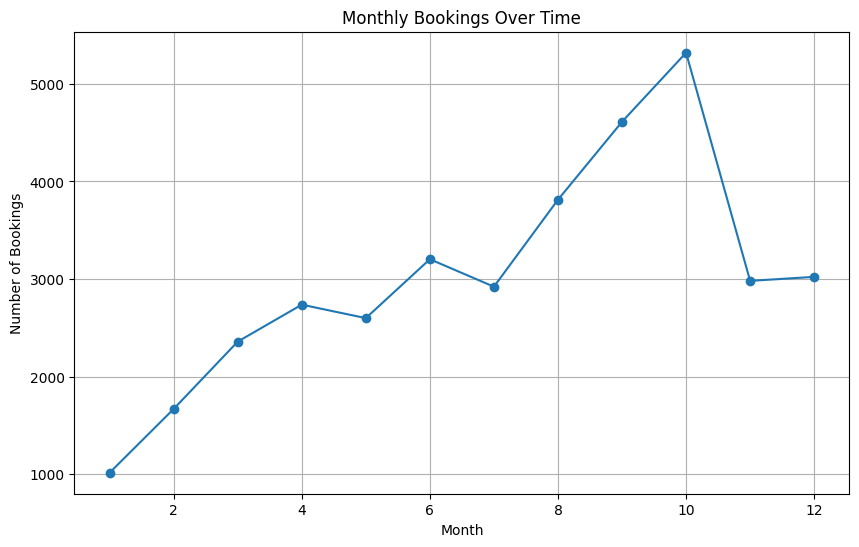

In [113]:
monthly_bookings = data.groupby('month').size()

plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()


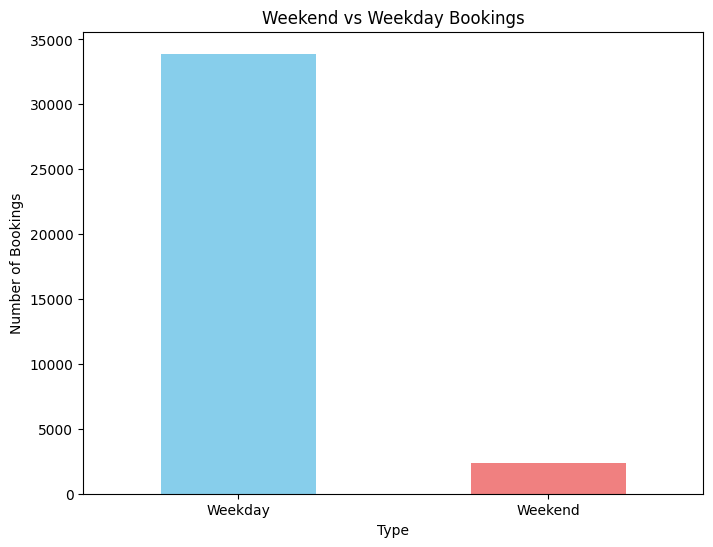

In [114]:
data['is_weekend'] = data['day'].apply(lambda x: 1 if x in [6, 7] else 0)

booking_comparison = data.groupby('is_weekend').size()

plt.figure(figsize=(8, 6))
booking_comparison.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Weekend vs Weekday Bookings')
plt.xlabel('Type')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.show()


In [115]:
numeric_cols=['number of adults', 'number of children','car parking space', 'lead time',
              'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
              'total nights', 'month', 'day', 'is_weekend']

### Building Model

* Importing Libraries

In [116]:
# Loading Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from numpy import where
from collections import Counter
import joblib
import os

In [117]:
data

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day,is_weekend
0,1,1,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,0,7,10.0,2.0,0
1,1,0,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0,4,11.0,6.0,1
2,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,1,4,2.0,28.0,0
3,1,0,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,1,2,5.0,20.0,0
4,1,0,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,1,3,4.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,1,2,9.0,13.0,0
36281,2,0,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,0,4,10.0,15.0,0
36282,2,0,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,0,4,12.0,26.0,0
36283,3,0,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,0,4,7.0,6.0,1


In [118]:
data["booking status"].value_counts()

booking status
0    24396
1    11889
Name: count, dtype: int64

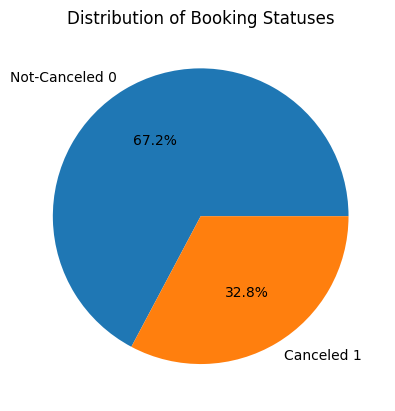

In [119]:
plt.pie(data['booking status'].value_counts(), labels=['Not-Canceled 0', 'Canceled 1'], autopct='%1.1f%%')
plt.title('Distribution of Booking Statuses')
plt.show()

* check for nulls

In [120]:
data.isnull().sum()

number of adults        0
number of children      0
type of meal            0
car parking space       0
room type               0
lead time               0
market segment type     0
repeated                0
P-C                     0
P-not-C                 0
average price           0
special requests        0
booking status          0
total nights            0
month                  37
day                    37
is_weekend              0
dtype: int64

In [121]:
data.dropna(axis=0,inplace=True)


In [122]:
data

,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total nights,month,day,is_weekend
0,1,1,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,0,7,10.0,2.0,0
1,1,0,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0,4,11.0,6.0,1
2,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,1,4,2.0,28.0,0
3,1,0,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,1,2,5.0,20.0,0
4,1,0,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,1,3,4.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,1,2,9.0,13.0,0
36281,2,0,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,0,4,10.0,15.0,0
36282,2,0,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,0,4,12.0,26.0,0
36283,3,0,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,0,4,7.0,6.0,1


In [123]:
features = data.columns
features

Index(['number of adults', 'number of children', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'booking status', 'total nights', 'month', 'day', 'is_weekend'],
      dtype='object')

In [124]:
'''
# For Numerical
num_pipeline = Pipeline(steps=[
                    ('scaler', StandardScaler())
                ])


# For Categorical
categ_pipeline = Pipeline(steps=[
                    ('ohe', OneHotEncoder(sparse_output=False))
                ])

all_pipelines = ColumnTransformer(transformers=[('numerical',num_pipeline,numeric_cols),
                                                ('categorical',categ_cols,categ_cols)])

data_final = all_pipelines.fit_transform(data)

OHE = OneHotEncoder(sparse_output=False,drop='first')
data = OHE.fit_transform(data[categ_cols])

# If you want to see the processed array
output_cols = numeric_cols + OHE.get_feature_names_out(categ_cols).tolist()

pd.DataFrame(data, columns=output_cols)
'''

"\n# For Numerical\nnum_pipeline = Pipeline(steps=[\n                    ('scaler', StandardScaler())\n                ])\n\n\n# For Categorical\ncateg_pipeline = Pipeline(steps=[\n                    ('ohe', OneHotEncoder(sparse_output=False))\n                ])\n\nall_pipelines = ColumnTransformer(transformers=[('numerical',num_pipeline,numeric_cols),\n                                                ('categorical',categ_cols,categ_cols)])\n\ndata_final = all_pipelines.fit_transform(data)\n\nOHE = OneHotEncoder(sparse_output=False,drop='first')\ndata = OHE.fit_transform(data[categ_cols])\n\n# If you want to see the processed array\noutput_cols = numeric_cols + OHE.get_feature_names_out(categ_cols).tolist()\n\npd.DataFrame(data, columns=output_cols)\n"

In [125]:
x = data.drop(axis=1,columns=["booking status"])
y = data['booking status']

In [126]:
y.value_counts()

booking status
0    24366
1    11882
Name: count, dtype: int64

```splitting data```

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

In [128]:
x_train.shape,y_train.shape

((28998, 16), (28998,))

In [129]:
x_train.columns.to_list()


['number of adults',
 'number of children',
 'type of meal',
 'car parking space',
 'room type',
 'lead time',
 'market segment type',
 'repeated',
 'P-C',
 'P-not-C',
 'average price ',
 'special requests',
 'total nights',
 'month',
 'day',
 'is_weekend']

In [130]:
numeric_cols = ['number of adults',
 'number of children',
 'car parking space',
 'lead time',
 'repeated',
 'P-C',
 'P-not-C',
 'average price ',
 'special requests',
 'total nights',
 'month',
 'day',
 'is_weekend']

categ_cols = ['market segment type','room type','type of meal']

In [131]:
# For Numerical
num_pipeline = Pipeline(steps=[
                    ('scaler', StandardScaler())
                ])


# For Categorical
categ_pipeline = Pipeline(steps=[
                    ('ohe', OneHotEncoder(sparse_output=False,drop='first'))
                ])

all_pipelines = ColumnTransformer(transformers=[('numerical',num_pipeline,numeric_cols),
                                                ('categorical',categ_pipeline,categ_cols)])

x_train_final = all_pipelines.fit_transform(x_train)
x_test_final = all_pipelines.transform(x_test)


In [132]:
# If you want to see the processed array
output_cols = numeric_cols + all_pipelines.named_transformers_['categorical'].named_steps['ohe'].get_feature_names_out(categ_cols).tolist()

x_train_final = pd.DataFrame(x_train_final, columns=output_cols)

* Feature Scaling (Standradization)

In [133]:
'''Scaler = StandardScaler()
Scaler.fit(x_train)

x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)
'''

'Scaler = StandardScaler()\nScaler.fit(x_train)\n\nx_train_scaled = Scaler.transform(x_train)\nx_test_scaled = Scaler.transform(x_test)\n'

In [134]:
np.bincount(y_train)

array([19493,  9505], dtype=int64)

# Deal with imabalanced data
```using class weight dictionary```

In [135]:

# 1. Wihtout Considering any solution for dealing with imbalanced data --- (X_train_final, y_train)

# 2. Use class_weight for solving imbalanced weight                 --- (X_train_final, y_train) & model class_weigth=dict_weights
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)
dict_weights = {}
for i in range(2):  # 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

dict_weights

{0: 0.32778122629146833, 1: 0.6722187737085317}

In [136]:
x_train_final.shape,y_train.shape

((28998, 26), (28998,))

# Logistic Regression Model

In [137]:
Log_Reg = LogisticRegression(penalty='l1',solver='liblinear',C=1.0,max_iter=1000,class_weight=dict_weights)
Log_Reg.fit(x_train_final,y_train)

LogisticRegression(class_weight={0: 0.32778122629146833, 1: 0.6722187737085317},
                   max_iter=1000, penalty='l1', solver='liblinear')

In [138]:
y_predict_log = Log_Reg.predict(x_test_final)
print(f"Accuracy of Logistic Classifier on test data = {accuracy_score(y_test,y_predict_log)*100:.2f}%")

Accuracy of Logistic Classifier on test data = 77.74%


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [139]:
CM_Log_Reg = confusion_matrix(y_test,y_predict_log)
CM_Log_Reg

array([[3809, 1064],
       [ 550, 1827]], dtype=int64)

```
True Positive = 3809
False Positive = 1064
False Negative = 550
True Negative = 1827
```

In [140]:
CR_Log_Reg = classification_report(y_test,y_predict_log)
print(CR_Log_Reg)


              precision    recall  f1-score   support

           0       0.87      0.78      0.83      4873
           1       0.63      0.77      0.69      2377

    accuracy                           0.78      7250
   macro avg       0.75      0.78      0.76      7250
weighted avg       0.79      0.78      0.78      7250



In [141]:
dict = {i: j for i, j in zip(x_train_final.columns, Log_Reg.coef_[0])}
dict

{'number of adults': 0.009468085592330663,
 'number of children': 0.03286442116291273,
 'car parking space': -0.27694558417612875,
 'lead time': 1.4211803463157044,
 'repeated': -0.45082583731208004,
 'P-C': 0.08497112786192582,
 'P-not-C': -0.032273360390842505,
 'average price ': 0.6287317565230077,
 'special requests': -1.1343900987967699,
 'total nights': 0.1360273546304158,
 'month': -0.18695024934443663,
 'day': 0.045402027236516124,
 'is_weekend': 0.02431561932280254,
 'market segment type_Complementary': -2.560445597657845,
 'market segment type_Corporate': -0.8874787496932174,
 'market segment type_Offline': -1.8452817744423202,
 'market segment type_Online': 0.003923371752201592,
 'room type_Room_Type 2': -0.39900088450573773,
 'room type_Room_Type 3': 0.0,
 'room type_Room_Type 4': -0.17874442509006253,
 'room type_Room_Type 5': -0.540810308354307,
 'room type_Room_Type 6': -0.820422432561526,
 'room type_Room_Type 7': -1.1827533470758387,
 'type of meal_Meal Plan 2': 0.0,
 

* Feature Contribution in the model fitting 
* from the previous results we find that
- 'P-C','P-not-C','is_weekend','number of adults','number of children' these features didnt contribute as much in the model

# KNN algorithm

In [142]:
x = data.drop(axis=1,columns=["booking status",
                              "day","is_weekend","P-C","P-not-C",
                              "number of adults","number of children",])
y = data['booking status']

In [143]:
x.columns

Index(['type of meal', 'car parking space', 'room type', 'lead time',
       'market segment type', 'repeated', 'average price ', 'special requests',
       'total nights', 'month'],
      dtype='object')

In [144]:
numeric_cols = ['car parking space',
 'lead time',
 'repeated',
 'average price ',
 'special requests',
 'total nights',
 'month']

# Deal with imbalanced data by oversampling the minority class using
```Using SMOTE```

In [145]:
# For Numerical
num_pipeline = Pipeline(steps=[
                    ('scaler', StandardScaler())
                ])


# For Categorical
categ_pipeline = Pipeline(steps=[
                    ('ohe', OneHotEncoder(sparse_output=False,drop='first'))
                ])

all_pipelines = ColumnTransformer(transformers=[('numerical',num_pipeline,numeric_cols),
                                                ('categorical',categ_pipeline,categ_cols),
                                                ])

x = all_pipelines.fit_transform(x)


In [146]:
oversampler = SMOTE(sampling_strategy=0.9,random_state=27)
x,y = oversampler.fit_resample(x,y)

In [147]:
x.shape,y.shape

((46295, 20), (46295,))

In [148]:
y.value_counts()

booking status
0    24366
1    21929
Name: count, dtype: int64

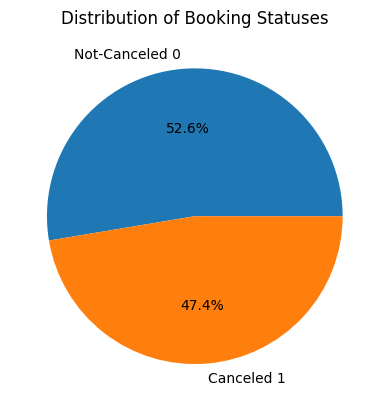

In [149]:
plt.pie(y.value_counts(), labels=['Not-Canceled 0', 'Canceled 1'], autopct='%1.1f%%')
plt.title('Distribution of Booking Statuses')
plt.show()

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)


In [151]:
knn = KNeighborsClassifier(n_neighbors=7,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [152]:
y_predict__test_knn = knn.predict(x_test)
print(f"Accuracy of KNN classifier on test data = {accuracy_score(y_test,y_predict__test_knn)*100:.2f}%")

Accuracy of KNN classifier on test data = 88.96%


In [153]:
CM_knn = confusion_matrix(y_test,y_predict__test_knn)
CM_knn

array([[4284,  589],
       [ 433, 3953]], dtype=int64)

```
True Positive = 4284
False Positive = 589
False Negative = 433
True Negative = 3953
```

In [154]:
CR_knn = classification_report(y_test,y_predict__test_knn)
print(CR_knn)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4873
           1       0.87      0.90      0.89      4386

    accuracy                           0.89      9259
   macro avg       0.89      0.89      0.89      9259
weighted avg       0.89      0.89      0.89      9259



# Hyper-Peremeter Tuning
* using Grid Search

In [162]:
peremeters = {'n_neighbors':np.arange(3,10).tolist()}
knn_clf = GridSearchCV(KNeighborsClassifier(),peremeters,scoring="accuracy",verbose=4)
knn_clf.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.869 total time=   0.3s
[CV 2/5] END .....................n_neighbors=3;, score=0.871 total time=   0.3s
[CV 3/5] END .....................n_neighbors=3;, score=0.870 total time=   0.4s
[CV 4/5] END .....................n_neighbors=3;, score=0.864 total time=   0.4s
[CV 5/5] END .....................n_neighbors=3;, score=0.873 total time=   0.3s
[CV 1/5] END .....................n_neighbors=4;, score=0.863 total time=   0.4s
[CV 2/5] END .....................n_neighbors=4;, score=0.860 total time=   0.4s
[CV 3/5] END .....................n_neighbors=4;, score=0.863 total time=   0.5s
[CV 4/5] END .....................n_neighbors=4;, score=0.865 total time=   0.4s
[CV 5/5] END .....................n_neighbors=4;, score=0.866 total time=   0.4s
[CV 1/5] END .....................n_neighbors=5;, score=0.859 total time=   0.2s
[CV 2/5] END .....................n_neighbors=5;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=4)

In [163]:
print(knn_clf.best_params_)
print(knn_clf.best_score_)

{'n_neighbors': 3}
0.8693433565411972


``` The best tuning for n_neighbours = 3```

* Results

In [164]:
pd.DataFrame(knn_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011070,0.007211,0.400266,0.049543,3,{'n_neighbors': 3},0.868790,0.870663,0.869853,0.864453,0.872958,0.869343,0.002803,1
1,0.009415,0.001375,0.505461,0.036479,4,{'n_neighbors': 4},0.862851,0.859997,0.863237,0.864993,0.865803,0.863376,0.002011,2
2,0.006597,0.001020,0.408060,0.064665,5,{'n_neighbors': 5},0.859476,0.861077,0.860942,0.861482,0.868503,0.862296,0.003177,3
3,0.006000,0.001409,0.364364,0.051637,6,{'n_neighbors': 6},0.861096,0.856217,0.862832,0.863237,0.864588,0.861594,0.002911,4
4,0.007910,0.003045,0.376901,0.036255,7,{'n_neighbors': 7},0.854347,0.859727,0.862427,0.857297,0.862022,0.859164,0.003028,5
5,0.008127,0.002520,0.403422,0.067310,8,{'n_neighbors': 8},0.851782,0.853787,0.862427,0.856487,0.860672,0.857031,0.004019,6
6,0.007804,0.001943,0.437283,0.069379,9,{'n_neighbors': 9},0.850837,0.859187,0.859727,0.853382,0.859322,0.856491,0.003671,7


In [165]:
x_test[0].reshape(1,-1)

array([[-0.17864147,  0.86180741, -0.16191342, -0.15538873, -0.78842765,
        -0.68114364,  0.77254941,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [166]:
knn.predict([x_test[500]])

array([1], dtype=int64)

### Dumping the model as a PRE-trained model using Joblib

* Dump ML model

In [167]:
joblib.dump(knn,os.path.join(os.getcwd(),'Knn-fined-tuned-clf.pkl'),compress=3)

['f:\\Cellula Internship\\3rd-task\\Knn-fined-tuned-clf.pkl']

* Dump Pipeline

In [168]:
joblib.dump(all_pipelines,os.path.join(os.getcwd(),'pipeline.pkl'),compress=3)

['f:\\Cellula Internship\\3rd-task\\pipeline.pkl']